# HW01 Gradient Descent Algorithm
Name : Park Yuna

In [3]:
# import the library
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Setting the objective fucntion
x = np.arange(-4, 3, 0.01)

def f(x):
    y = x**4 + x**3 - 6*x**2 + 4*x + 12
    return y

## Create a plot showing the objective function within −4 ≤ x ≤ 3

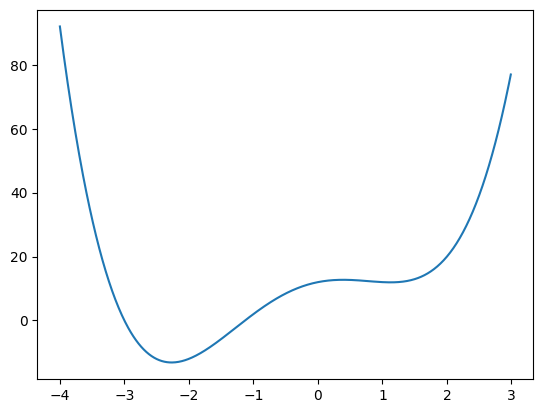

In [19]:
plt.plot(x, f(x))

## Explain how you design your own gradient descent algorithm from scratch


![image](hw01.jpg)

## Discuss with your teammates and answer the following question:

### 1

In [33]:
def Derivative(x, f):
    h = 1e-5
    y_prime = (f(x+h) - f(x)) / h
    return y_prime

Reference : https://glorychoi.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%88%98%EC%B9%98-%EB%AF%B8%EB%B6%84 

In [42]:
def GradientDescent(f, stepsize, initial, maxiter):
    x0 = initial
    epsilon = 1e-5
    for iter in range(maxiter):
        x = x0 - stepsize*Derivative(x0, f)
        x0 = x
    return x, f(x)

In [41]:
GradientDescent(f, 0.01, 2.5, 10)

(1.2756444169200165, 12.062785153383288)

Optimal Solution은 `1.2756444169200165`이고 Optimum value는 `12.062785153383288`
위에서 그린 함수 그래프로 보건데 0보다 작은 값이 존재하고 그때의 x값은 -2보다 작으므로 Global optimum은 아닐 것이다. 
알고리즘이 Global minimum에 가까이 다가가게 하기 위해선  아래의 4가지 방법이 가능하다.
1. inital point를 조정한다. 
2. stepsize를 조정한다. 
3. 반복수를 늘린다. 
4. 다른 Stopping criterion을 도입한다. 

In [51]:
def GradientDescent2(f, stepsize, initial, maxiter):
    x0 = initial
    epsilon = 1e-5
    iter = 0
    for i in range(maxiter):
        x = x0 - stepsize*Derivative(x0, f)
        iter += 1
        if abs(x - x0) < epsilon:
            break
        x0 = x
    return x, f(x), iter

In [52]:
GradientDescent2(f, 0.01, 2.5, 1000)

(1.1258636810472211, 11.931881728074773, 79)

`GradientDescent2`에서는 3번과 4번의 방법을 도입했다. 반복수를 1000으로 늘리고 x가 수렴하면 멈추게 하는 Stopping Criterion을 도입했다. 
Optimum Solution은 `1.1258636810472211`이었으면 79번째 반복에서 수렴했다.

### 2

In [76]:
GradientDescent(f, 0.01, 0.35, 10)

(0.299423446370389, 12.694649925046393)

Initial point x = 0.35
Step size = 0.01
The maximum number of iterations = 10

위의 조건 하에서 Optimum Solution은 `0.299423446370389`이다. 해당 값이 Global solution이라고는 볼 수 없을 듯 하나 initial point가 2.5일때에 비하면 Global optimum에 가까이 다가간듯 하다.

#### Fix the step size and maximum number of iterations and change initial point

In [78]:
# initial point is 0.35 
print(f'initial point is 0.35 :', GradientDescent(f, 0.01, 0.35, 10))
# initial point is 0
print(f'initial point is 0 :', GradientDescent(f, 0.01, 0, 10))
# initial point is -1
print(f'initial point is -1 :', GradientDescent(f, 0.01, -1, 10))
# initial point is -2
print(f'initial point is -2 :', GradientDescent(f, 0.01, -2, 10))
# initial point is -3
print(f'initial point is -3 :', GradientDescent(f, 0.01, -3, 10))

initial point is 0.35 : (0.299423446370389, 12.694649925046393)
initial point is 0 : (-0.7171954332632069, 5.940674990524078)
initial point is -1 : (-2.179014339630413, -13.006377134481426)
initial point is -2 : (-2.2634534403043176, -13.14191759951915)
initial point is -3 : (-2.271706025814055, -13.141898933341402)


initial point를 바꿔가며 optimum solution과 optimimum을 출력한 결과 -2와 -3사이의 -2.2xx에 global minimum이 있을 것으로 추정된다.

#### Fix the step size and maximum number of iterations and change initial point

In [80]:
print(f'max iter is 100 and step size is 0.1', GradientDescent(f, 0.1, 0.35, 100))
print(f'max iter is 100 and step size is 0.001', GradientDescent(f, 0.001, 0.35, 100))
print(f'max iter is 1000 and step size is 0.01', GradientDescent(f, 0.01, 0.35, 1000))
print(f'max iter is 1000 and step size is 0.001', GradientDescent(f, 0.001, 0.35, 1000))


max iter is 100 and step size is 0.1 (1.1257801397723086, 11.931881697465846)
max iter is 100 and step size is 0.001 (0.2964849878107131, 12.69230888490869)
max iter is 1000 and step size is 0.01 (-2.26752587766928, -13.142215632376107)
max iter is 1000 and step size is 0.001 (-2.2675258772433984, -13.142215632376185)


반복수를 1000으로 늘렸을 때, global minimum에 도달하는 듯 하다. 반복수가 100일 때 step size에 따른 차이가 나타나는데 step size가 큰 경우에서는 initial point가 2.5일 때와 같이 local minimum으로 수렴하는 듯 하다. 반면 stepsize가 작은 경우에는 global minimum으로 방향을 잘 찾은 듯하다.

#### Which option would like to choose? What is the reason why you end up choosing the option?

함수에 대한 정보를 어느정도로 알고 있느냐와 pre-determined range에 따라 얼마나 많은 연산이 필요하냐를 기준으로 다른 방식을 고를 것 같다. 
그렇지만 많은 경우에 initial point를 조정하는 방법을 택할 것이다. initial point를 잘 못 잡으면 iter를 높이더라도 global minimum을 구하지 못하고 local minimum 값만을 구할 것이기 때문이다. 